# Saahil Raj
# The Sparks Foundation

### Task 1 : Prediction using Supervised Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the Dataset and Printing first five Columns
df = pd.read_csv("StudentScores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.shape

(25, 2)

In [6]:
#Check for any Null Values:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data Visualization

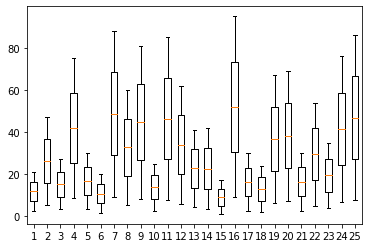

In [11]:
plt.boxplot(df)
plt.show()

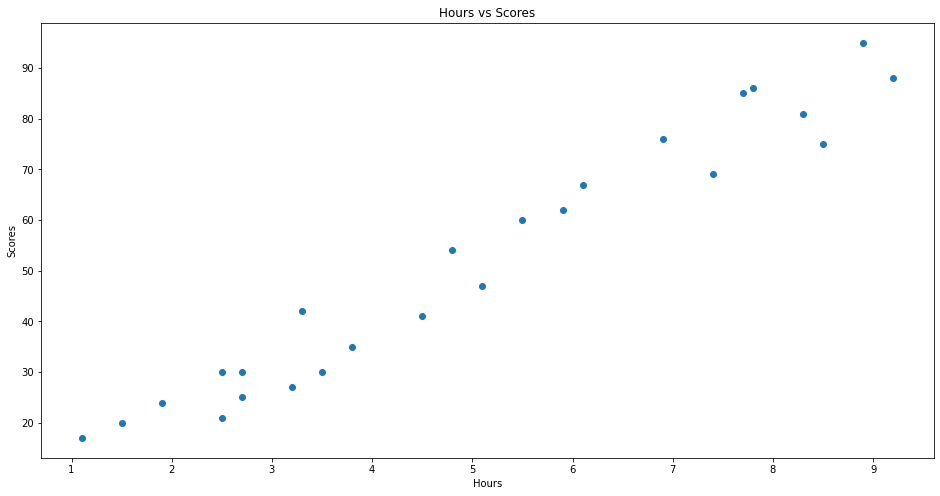

In [12]:
fig,ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Hours'],df['Scores'])

plt.title('Hours vs Scores') 
ax.set_ylabel('Scores')
ax.set_xlabel('Hours')
plt.show()

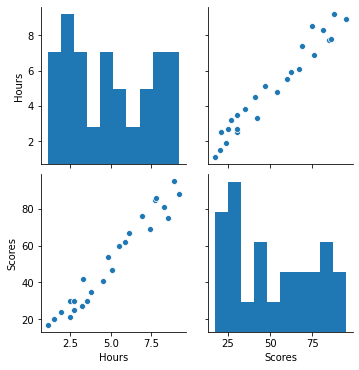

In [13]:
sns.pairplot(df)

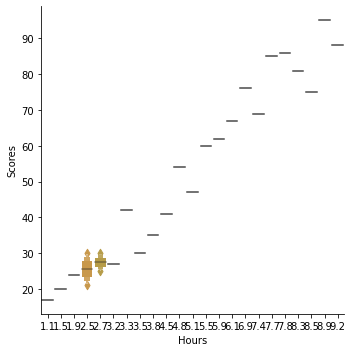

In [35]:
sns.catplot(x='Hours',y='Scores',data=df,kind='boxen')

In [14]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

In [15]:
#Splitting df into train and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

In [16]:
# Training the model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)
print("Training Successfull")

LinearRegression()

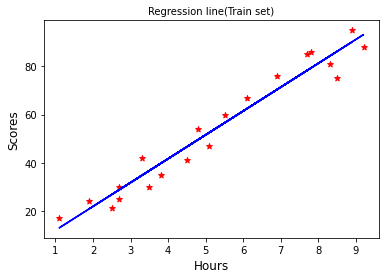

In [17]:
#plotting the REGRESSION LINE---
Y0 = reg.intercept_ + reg.coef_*X_train

#plotting on train data
plt.scatter(X_train,Y_train,color='red',marker='*')
plt.plot(X_train,Y0,color='blue')
plt.xlabel("Hours",fontsize=12)
plt.ylabel("Scores",fontsize=12)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

In [18]:
# Predicting the Scores for test data
Y_pred = reg.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [22]:
df_compare = pd.DataFrame({ 'Actual':list(Y_test),'Result':list(Y_pred)})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [33]:
# Checking the Accuracy of the Model
from sklearn import metrics
print(metrics.r2_score(Y_test,Y_pred)*100,"% Accurate")

94.54906892105356 % Accurate


## Predicting the Score for a Student studying 9.25 hrs/day

In [34]:
Prediction_score = reg.predict([[9.25]])
print("Predicted score for a student studying 9.25 hours in a day :",Prediction_score)

Predicted score for a student studying 9.25 hours in a day : [93.69173249]


## Conclusion
### We can conclude that if a student studied for 9.25 hours per day , then the student will score 93.69 Marks